# Title: Heart Disease Prediction
`Author:` [Kaleem u Allah](https://www.kaggle.com/kaleemkm)\
`Date:` 10-02-2024\
`Dataset:` [Heart Disease Prediction](https://www.kaggle.com/ronitf/heart-disease-uci)


## Meta-Data (About Dataset)

### Context
This is a multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.

### Content
#### Column Descriptions:
* `id `(Unique id for each patient)
* `age` (Age of the patient in years)
* `origin` (place of study)
* `sex` (Male/Female)
* `cp` chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
* `trestbps` resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
* `chol` (serum cholesterol in mg/dl)
* `fbs` (if fasting blood sugar > 120 mg/dl)
* `restecg` (resting electrocardiographic results)
* -- `Values:` [normal, stt abnormality, lv hypertrophy]
* `thalach:` maximum heart rate achieved
* `exang:` exercise-induced angina (True/ False)
* `oldpeak:` ST depression induced by exercise relative to rest
* `slope:` the slope of the peak exercise ST segment
* `ca:` number of major vessels (0-3) colored by fluoroscopy
* `thal:` [normal; fixed defect; reversible defect]
* `num:` the predicted attribute
### Acknowledgements
#### Creators:
* Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
* University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
* University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
* V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.
### Relevant Papers:
* Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310.Web Link
* David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database." Web Link
* Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61. Web Link
### Citation Request:
The authors of the databases have requested that any publications resulting from the use of the data include the names of the principal investigator responsible for the data collection at each institution. 

**They would be:**

* Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
* University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
* University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
* V.A. Medical Center, Long Beach and Cleveland Clinic Foundation:Robert Detrano, M.D., Ph.D.

## Aims and Objective:
We will fill this after doing some exploratory Data Analysis (EDA).

### Import Libraries
Let's start the project by importing all the libraries that we will need in this project.

In [1]:
# Import libraries

# 1. To handle the data
import pandas as pd
import numpy as np

# 2. To visulaize the data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# TO preprocess the data
from sklearn.preprocessing import  StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer

# Import iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Import machine learning libraries
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# For classification tasks
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

### Load the dataset

In [2]:
# Load the data from csv file placed locally in our pc

df= pd.read_csv('heart_disease_uci.csv')

# Print the first 5 rows of the dataframe
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


## Exploratory Data Analysis(EDA)
### Explore Each Column

In [3]:
# Exploring the datatypes of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [4]:
# Check the data shape
df.shape

(920, 16)

In [5]:
# id column
df['id'].min(), df['id'].max()

(1, 920)

In [6]:
# age column
df['age'].min(), df['age'].max()

(28, 77)

<Axes: xlabel='age', ylabel='Count'>

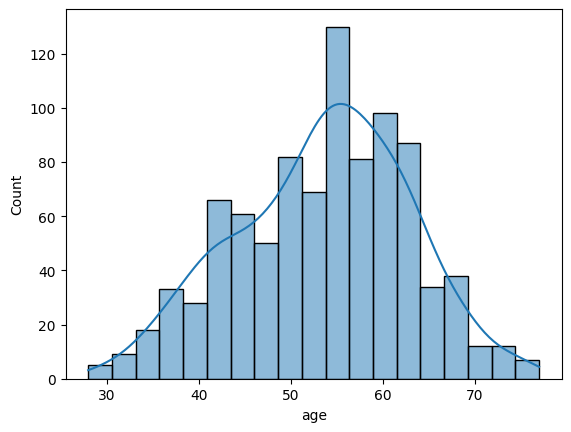

In [7]:
# Draw a histogram to see the distribution of age column
sns.histplot(df['age'], kde=True)

Mean: 53.51086956521739
Median: 54.0
Mode: 0    54
Name: age, dtype: int64


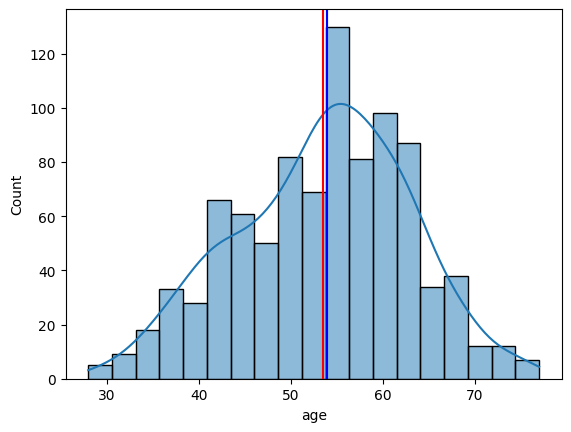

In [9]:
# Plot the mean. median and mode of age column using sns
sns.histplot(df['age'], kde=True)
plt.axvline(df['age'].mean(), color='red')
plt.axvline(df['age'].median(), color='green')
plt.axvline(df['age'].mode()[0], color='blue')

# Print the value of mean, median and mode
print(f'Mean: {df["age"].mean()}')
print(f'Median: {df["age"].median()}')
print(f'Mode: {df["age"].mode()}')

Let's explore the gender based distribution of the dataset for age column.

In [10]:
# Plot the histogram of age column using plotly and coloring this by sex
fig= px.histogram(data_frame= df, x='age', color='sex')
fig.show()

In [12]:
# Find the values of sex column
df['sex'].value_counts()

sex
Male      726
Female    194
Name: count, dtype: int64

In [14]:
# Calculate the percentage of male and female value counts in the data
male_count= 726
female_count = 194
total_count = male_count + female_count

# Calculate the percentage
male_percentage = (male_count / total_count) * 100
female_percentage = (female_count / total_count) * 100

print(f"Male percentage in the data: {male_percentage:.2f}%")
print(f"Female percentage in the data: {female_percentage:.2f}%")

# Differnce
difference_percentage = ((male_count- female_count)/ female_count)*100
print(f"Males are {difference_percentage:.2f}% more likely to have heart disease than females")

Male percentage in the data: 78.91%
Female percentage in the data: 21.09%
Males are 274.23% more likely to have heart disease than females


In [11]:
# Find the value count by age column grouping by sex column
df.groupby(['sex'])['age'].value_counts()

sex     age
Female  54     15
        51     11
        62     10
        48      9
        43      9
               ..
Male    77      2
        76      1
        33      1
        28      1
        31      1
Name: count, Length: 91, dtype: int64

In [15]:
# Let's deal with dataset columns
# Find the unique values in dataset columns
df['dataset'].unique()

array(['Cleveland', 'Hungary', 'Switzerland', 'VA Long Beach'],
      dtype=object)

In [17]:
# Find unique values count in dataset columns
df['dataset'].value_counts()

dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64

In [22]:
# Plot the countplot of dataset column
# sns.countplot(x='dataset', data=df, hue='sex')

# Make a countplot of dataset column using plotly
fig= px.bar(data_frame= df, x='dataset', color='sex')
fig.show()

# print the values count of dataset column grouped by sex
df.groupby(['sex'])['dataset'].value_counts()

sex     dataset      
Female  Cleveland         97
        Hungary           81
        Switzerland       10
        VA Long Beach      6
Male    Hungary          212
        Cleveland        207
        VA Long Beach    194
        Switzerland      113
Name: count, dtype: int64

In [26]:
# Make a plot of age column using plotly and coloring this by dataset column
fig= px.histogram(data_frame= df, x='age', color='dataset')
fig.show()

# print the mean, median and mode of age column grouped by dataset column
print(f"Mean of the dataset: {df.groupby(['dataset'])['age'].mean()}")
print("----------------------------------------")
print(f"Median of the dataset: {df.groupby(['dataset'])['age'].median()}")
print("----------------------------------------")
print(f"Mode of the dataset: {df.groupby(['dataset'])['age'].agg(pd.Series.mode)}")
print("----------------------------------------")

Mean of the dataset: dataset
Cleveland        54.351974
Hungary          47.894198
Switzerland      55.317073
VA Long Beach    59.350000
Name: age, dtype: float64
----------------------------------------
Median of the dataset: dataset
Cleveland        55.5
Hungary          49.0
Switzerland      56.0
VA Long Beach    60.0
Name: age, dtype: float64
----------------------------------------
Mode of the dataset: dataset
Cleveland              58
Hungary                54
Switzerland            61
VA Long Beach    [62, 63]
Name: age, dtype: object
----------------------------------------


## Outputs
1. The minimum age to have a heart disease starts from 28 years old
2. Most of the people get heart disease at the age of 53-54 years
3. Most of the males and females get are with heart disease at the age of 54-55 years.
4. Male percentage in the data: 78.91%
5. Female percentage in the data: 21.09%
6. Males are 274.23% more likely to have heart disease than females in the data.
7. We have highest number of people from Cleveland (304) and lowest from Switzerland (123).
   1. The highest number of females in this dataset are from Cleveland (97) and lowest from VA Long Beach (6).
   2. The highest number of males in this dataset are from Hungry (212) and lowest from Switzerland (113).
   3. 